El formato de entrega será subir a u-cursos un Jupyter notebook laboratorio5.ipynb, que se debe ejecutar sin errores desde la primera celda a la última. Todo el código debe estar en el mismo notebook, el código debe estar comentado y el notebook debe estar escrito en forma de informe técnico, escribiendo una celda markdown antes de cada celda de código. **Recuerde escribir el nombre de todos los integrantes que trabajaron en la elaboración del entregable**.


---



**Integrantes**:
1. Jorge Herrera
2. Fabián Leal
3. Angie Villamil

# LABORATORIO 5: CLASIFICACIÓN

OBJETIVOS:

1. COMPRENDER LAS NOCIONES BÁSICAS DE LAS LABORES DE CLASIFICACIÓN Y EL ROL DE LA INTERPRETABILIDAD DE LOS MODELOS.

2. COMPRENDER EL CONCEPTO DE CROSS-VALIDATION.

3. COMPRENDER EL CONCEPTO DE OVERFITTING.



---



## 1. CLASIFICACIÓN

In [0]:
class MachineLearning:
  # Estudia como aprender automáticamente a hacer predicciones certeras 
  # basado en observaciones del pasado.

    def Clasificador(data):
      # Asigna nuevos ejemplos a una determinada clase dentro de un conjunto predefinido
        clasificador = 'Un algoritmo que mediante la optimización de parámetros busca identificar patrones que distinguen a las diferentes clases'
        ejemplos = ['Decision Trees', 'Random Forest', 'Support Vector Machines',
                   'Redes Neuronales', 'Naive Bayes', 'Logit', 'etc.']
        return clasificador
    
    def Predictor(data):
      # Próximo laboratorio, pero mismos principios.
      predictor = '?'
      return predictor
 

[Tarea] Aprender del maestro: [
Siraj Raval
](https://www.youtube.com/watch?v=cAICT4Al5Ow)

### 1.1 Matriz de confusión

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png")

## 2. CROSS-VALIDATION

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn-images-1.medium.com/max/800/1*J2B_bcbd1-s1kpWOu_FZrg.png")

## 3. OVERFITTING



In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-validation-curve.png")

Ejemplo con código: [Notebook scikit-learn Underfitting vs. Overfitting](https://colab.research.google.com/drive/1bVRbyAXUm5-jlslwrUKuZqNRtYVFJ_I2)

## 4. EJEMPLOS

In [5]:
#Original: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
# load libraries
import pandas
import matplotlib.pyplot as plt
# load dataset diabetes
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Get the target and the values in differents arrays
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
X[:5,:]


array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [7]:
# libraries
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# prepare configuration for cross validation test harness
seed = 101
# prepare models
models = []
models.append(('LOGIT  ', LogisticRegression()))
models.append(('KNN    ', KNeighborsClassifier()))
models.append(('D_TREE ', DecisionTreeClassifier()))
models.append(('NB     ', GaussianNB()))
models.append(('SVM    ', SVC()))
models

[('LOGIT  ',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('KNN    ',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('D_TREE ',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB     ', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('SVM    ', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_funct

In [8]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
print('Model    Accuracy (mean)   Accuracy (std)')
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s:   %f         %f" % (name, cv_results.mean(), cv_results.std())
	print(msg)

Model    Accuracy (mean)   Accuracy (std)
LOGIT  :   0.769515         0.048411
KNN    :   0.726555         0.061821
D_TREE :   0.706989         0.062584
NB     :   0.755178         0.042766


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

SVM    :   0.651025         0.072141


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


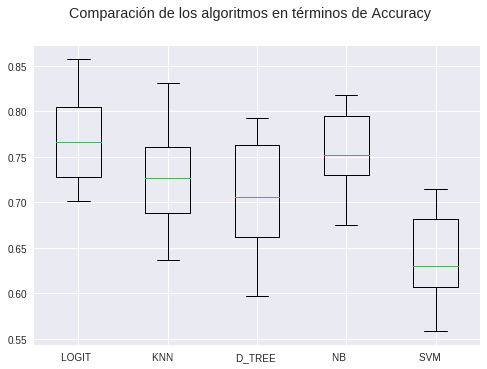

In [9]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparación de los algoritmos en términos de Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

---
## 5. INVESTIGACIÓN (3 ptos)



### Métricas de desempeño (2 ptos)
5.1 Investigue las siguientes medidas de desempeño para los modelosde clasificación:

En las siguientes definiciones, usamos la siguiente notaciòn: 

tp: True positives \
tn: True negatives \
fp: False positives \
fn: False negatives \

a) Accuracy: La exactitud (accuracy) es la fracción de predicciones que el modelo realizó correctamente, es decir es el número de predicciones correctas dividido en el número de predicciones totales. 

$$ \frac{tp+tn}{tp+fp+fn+tn}  $$
 \\

b) Precision: La precisión (solo clasificación binaria) corresponde a la proporcion de identificaciones positivas que fueron acertadas.

$$\frac{tp}{tp+fp}  $$
 \\
 
c) Recall: La exhaustividad (recall) corresponde a la proporción de positivos que se logró identificar. (es decir, la 
proporción de positivos identificados entre el total de positivos que hubo) 
$$ \frac{tp}{tp+fn} $$
 \\

d) AUC: Primero, se debe definir la curva ROC. La curva ROC es un gráfico que tiene en el eje Y la tasa de verdaderos positivos
(es decir, la exhaustividad o recall), y en el eje x la tasa de falsos positivos.


$$\frac{fp}{fp+tn}$$ 
La curva representa estas dos medidas en diferentes umbrales de clasificación. Un umbral de clasificación corresponde a la 
barrera de entrada para considerar positivo a un elemento, por lo que reducirla aumenta los falsos positivos, por ejemplo.

El AUC es el área bajo la curva ROC completa. Corresponde a una medición transversal del rendimiento de todos los umbrales
de clasificación posibles. En la parte 5.2 se explicará en más detalle esta métrica.
 \\
 \\

e) F-Measure 
$$ 2* \frac{precision*recall}{precision+recall} $$

\\


5.2  ¿Son equivalente los resultados de los modelos en términos de Accuracy y AUC? Utilice ejemplos prácticos para su respuesta.  \\

No, son métricas que evalúan cosas distintas. Por ejemplo, si consideramos los tests de VIH de un hospital, y nuestro objetivo es maximizar accuracy, sabiendo que el 96% de estos son negativos (0's), podemos usar un "clasificador" que asigne 0's a toda la data, el cual obtendría un accuracy de 96%. Si al mismo tiempo miramos el AUC de este clasificador, este sería bajo (cercano a 0,5)

### Selección de atributos (1 pto)

5.3 Elabore una tabla comparativa de los modelos de clasificación
utilizados en el laboratorio de acuerdo a los siguientes campos: 1) uso de recursos computacionales, 2) interpretabilidad y 3) overfitting.


Aclaramos que cuando se habla de interpretabilidad mediana, se habla de que cualquier persona con un background científico o de ingeniería es capaz de entender los resultados de estos modelos, en el peor de los casos, teniendo que usar la ayuda de Internet por unos minutos. Un ejemplo de interpretabildiad compleja, sería, por ejemplo el caso de las redes neuronales. 


<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<h2>Tabla comparativa modelos de clasificación</h2>

<table>
  <tr>
    <th>Modelo</th>
    <th>Uso de recursos computacionales</th>
    <th>Interpretabilidad</th>
    <th>Overfitting</th>
  </tr>
  <tr>
    <td>Logit</td>
    <td>Baja</td>
    <td>Mediana</td>
    <td>Baja propensidad, cuando no hay dependencia lineal</td>
  </tr>
  <tr>
    <td>K nearest neighbors</td>
    <td>Dependiendo de n, puede ser alta</td>
    <td>Simple</td>
    <td>Baja propensidad, si se elige un K suficientemente grande</td>
  </tr>
  <tr>
    <td>Decision tree</td>
    <td>Alta</td>
    <td>Mediana</td>
    <td>Alta propensidad, cuando es irrestricto se crean ramas hasta memorizar la data</td>
  </tr>
  <tr>
    <td>Naive Bayes</td>
    <td>Baja</td>
    <td>Mediana</td>
    <td>Extremadamente raro, ya que al no considerar las
interacciones entre variables, la data de entrenamiento
que se utiliza es mínima</td>
  </tr>
  <tr>
    <td>SVM</td>
    <td>Alta en el entrenamiento</td>
    <td>Mediana</td>
    <td>Baja propensidad, siempre y cuando el parámetro de regularización C sea elegido adecuadamente</td>

  </tr>
</table>

</body>
</html>
---



## 6. LABORATORIO (3 ptos)

### Descripción
---
Recuerda el problema de los laboratorios 2 y 3? Si no lo recuerda,
a continuación un pequeño recordatorio: "Considere el problema
que enfrenta una entidad financiera que tiene altas tasas de
fuga voluntaria. Esta institución no tiene claro cuál es el perfil
característico que tienen los clientes fugitivos ni cuáles son las
razones por las cuales estos se fugan".

Con la ayuda de sus trabajos anteriores se eliminaron duplicidades,
imputaron valores perdidos, se escalaron los valores y restaron los
atributos que no contribuían al problema de clasificación (es decir,
el nuevo dataset está listo para que se apliquen los modelos de
clasificación).


### Datos
***
Se le entregarán 2 archivos: BASE y VALIDACION. En BASE se encuentra el conjunto de datos con los cuales se deben entrenar los modelos de clasificación y en VALIDACION el conjunto de datos sobre los cuales se aplicarán estos modelos. Ambos conjuntos poseen los mismos atributos, pero en VALIDACION no se tiene información sobre el atributo FUGA.

Variable | Descripción
------------- | -------------
1. ID | Identificador del cliente
2. Genero | Genero del cliente
3. Edad | Edad en años
4. NIV_Educ | Nivel educacional
5. E_Civil | Estado civil
6. COD Com | Código de la comuna
7. COD_Ofi | Código de la oficina 
8. Ciudad | Ciudad de la oficina
9. D_Marzo | Deuda de Marzo
10. D_Abril | Deuda de Abril 
11. D_Junio | Deuda de Junio 
12. D_Julio | Deuda de Julio 
13. D_Septiembre | Deuda de Septiembre
14. M_Moroso | Meses en Mora
15. Fuga | Variable objetivo


### Tareas:
***
Dada la información que ha sido presentada, se le pide que realice
las siguientes tareas:

a) **[2 ptos]** Implemente al menos 3 modelos de clasificación, reporte su desempeño y justifique la forma que ha seleccionado para evaluar su desempeño. Luego concluya qué modelo es mejor y porque.

b) **[1 pto]** Seleccione uno de los modelos y aplíquelo en la base de datos de VALIDACION. Debe entregar un archivo .xlsx con la predicción realizada.

In [0]:
#Guía completa : https://colab.research.google.com/drive/1SU176zTQvhflodEzuiacNrzxFQ6fWeWC#scrollTo=42Dvi-sgxNqz
!pip install -U -q PyDrive

#LINKS:
#BASE:        https://drive.google.com/open?id=1dTcwh3gzaS3d1xvgAt5WoLKn1XNFCb07
#VALIDACION:  https://drive.google.com/open?id=1ZA0PCWnb3A729AsUPNcJf1hLhRFeQR8C

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id_base = '1dTcwh3gzaS3d1xvgAt5WoLKn1XNFCb07'
#file_id_validacion = '1ZA0PCWnb3A729AsUPNcJf1hLhRFeQR8C'
downloaded = drive.CreateFile({'id': file_id_base})
downloaded.GetContentFile('exported.xlsx')

In [11]:
!pip install -q xlrd
import pandas as pd
#BASE = pd.read_excel('exported.xlsx')
#BASE.head()
VALID=pd.read_excel('VALIDACION.xlsx')
VALID.head()

FileNotFoundError: ignored

In [0]:
#Reemplazar valores de Fuga y Género por 0s y 1s

VALID['GENERO'].replace(
    to_replace='F',
    value=0,
    inplace=True
)
VALID['GENERO'].replace(
    to_replace='M',
    value=1,
    inplace=True
)
VALID.head()

In [0]:
#Reemplazar valores de Fuga y Género por 0s y 1s
BASE['FUGA'].replace(
    to_replace='NO FUGA',
    value=0,
    inplace=True
)
BASE['FUGA'].replace(
    to_replace='FUGA',
    value=1,
    inplace=True
)
BASE['GENERO'].replace(
    to_replace='F',
    value=0,
    inplace=True
)
BASE['GENERO'].replace(
    to_replace='M',
    value=1,
    inplace=True
)
BASE.head()

In [0]:
BASE.describe()

In [0]:
# Se agregan las variables dummies correspondientes al Nivel Eduacional, para poder utilizarlo cen el modelo
VALID = pd.concat([VALID.drop("NIV_EDUC",axis=1), pd.get_dummies(VALID['NIV_EDUC'])], axis=1)
# Se agregan las variables dummies correspondientes al Estado Civil, para poder utilizarlo cen el modelo
VALID = pd.concat([VALID.drop("E_CIVIL",axis=1), pd.get_dummies(VALID['E_CIVIL'])], axis=1)
# Se agregan las variables dummies correspondientes a la Ciudad, para poder utilizarlo cen el modelo
VALID = pd.concat([VALID.drop("CIUDAD",axis=1), pd.get_dummies(VALID['CIUDAD'])], axis=1)
# Se agregan las variables dummies correspondientes al Código de Oficina, para poder utilizarlo cen el modelo
VALID = pd.concat([VALID.drop("COD_OFI",axis=1), pd.get_dummies(VALID['COD_OFI'])], axis=1)
# Se agregan las variables dummies correspondientes a el Código de Comuna, para poder utilizarlo cen el modelo
VALID = pd.concat([VALID.drop("COD_COM",axis=1), pd.get_dummies(VALID['COD_COM'])], axis=1)
VALID.head()

In [0]:
# Se agregan las variables dummies correspondientes al Nivel Eduacional, para poder utilizarlo cen el modelo
BASE = pd.concat([BASE.drop("NIV_EDUC",axis=1), pd.get_dummies(BASE['NIV_EDUC'])], axis=1)
# Se agregan las variables dummies correspondientes al Estado Civil, para poder utilizarlo cen el modelo
BASE = pd.concat([BASE.drop("E_CIVIL",axis=1), pd.get_dummies(BASE['E_CIVIL'])], axis=1)
# Se agregan las variables dummies correspondientes a la Ciudad, para poder utilizarlo cen el modelo
BASE = pd.concat([BASE.drop("CIUDAD",axis=1), pd.get_dummies(BASE['CIUDAD'])], axis=1)
# Se agregan las variables dummies correspondientes al Código de Oficina, para poder utilizarlo cen el modelo
BASE = pd.concat([BASE.drop("COD_OFI",axis=1), pd.get_dummies(BASE['COD_OFI'])], axis=1)
# Se agregan las variables dummies correspondientes a el Código de Comuna, para poder utilizarlo cen el modelo
BASE = pd.concat([BASE.drop("COD_COM",axis=1), pd.get_dummies(BASE['COD_COM'])], axis=1)
BASE.head()

In [12]:
#Get the target and the values in differents arrays
array = BASE.values
Y = array[:,9]
Y


NameError: ignored

In [0]:
valid=VALID.drop("FUGA", axis=1)
array = valid.values
X2=array[:,1:9]
X2

In [0]:
base=BASE.drop("FUGA", axis=1)
array = base.values
X=array[:,1:9]
X

In [0]:
# libraries
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# prepare configuration for cross validation test harness
seed = 101
# prepare models
models = []
models.append(('LOGIT  ', LogisticRegression()))
models.append(('KNN    ', KNeighborsClassifier()))
models.append(('D_TREE ', DecisionTreeClassifier()))
models.append(('NB     ', GaussianNB()))
models.append(('SVM    ', SVC()))
models

In [0]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
print('Model    Accuracy (mean)   Accuracy (std)')
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s:   %f         %f" % (name, cv_results.mean(), cv_results.std())
	print(msg)

Usando el criterio del accuracy, se puede observar que el modelo que mejores resultados obtuvo fue el arbol de decisión.

In [0]:
mod=DecisionTreeClassifier()
mod.fit(X,Y)
pred=model.predict(X2)
print(pred)
type(pred)